# Challenge Alura - Data Science 1

## Introdução

Neste notebook, foi realizada a análise dos dados de vendas, desempenho e avaliações de quatro lojas fictícias da **Alura Store**. O objetivo é identificar qual loja o Senhor João deve vender para iniciar um novo empreendimento, com base em métricas como faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais e menos vendidos e o frete médio.

A análise inclui a manipulação de dados usando **Pandas**, criação de visualizações com **Matplotlib** e a interpretação dos resultados para embasar a recomendação final.


In [40]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
from typing import Tuple
import matplotlib as mpl


# Configurações globais
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['font.family'] = 'serif'

In [ ]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


### Dicionário de Dados - Dataset de Vendas

| Campo                | Descrição                                              | Tipo             |
|----------------------|--------------------------------------------------------|------------------|
| `Produto`       | Nome do item vendido                                   | Texto            |
| `Categoria do Produto`     | Categoria do produto (ex: Eletrônicos, Roupas)         | Texto            |
| `Preço`              | Valor da venda (em moeda local)                        | Numérico         |
| `Frete`        | Custo do frete                                         | Numérico         |
| `Data da Compra`        | Data da compra (AAAA-MM-DD)                            | Data             |
| `Vendedor`     | Vendedor                                      | Texto            |
| `Local da Compra`     | Local onde a compra foi efetuada                                      | Texto            |
| `Avaliação da compra`          | Feedback dos clientes                         | Numérico         |
| `Tipo de pagamento`     | Método de pagamento (ex: cartão, boleto)               | Texto            |
| `Quantidade de parcelas`    | Número de parcelas escolhidas                          | Inteiro          |
| `latitude_cliente`   | Latitude da localização do cliente                     | Numérico         |
| `longitude_cliente`  | Longitude da localização do cliente                    | Numérico         |


In [3]:
# Colunas de cada dataset
lista_datasets = [loja1, loja2, loja3, loja4]

for i in range(len(lista_datasets)):
    print(f"Colunas do dataset {i+1}:")
    print(lista_datasets[i].columns)
    print("\n")

Colunas do dataset 1:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


Colunas do dataset 2:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


Colunas do dataset 3:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


Colunas do dataset 4:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dt

In [4]:
# Info geral de cada dataset
for i in range(len(lista_datasets)):
    print(f"Info do dataset {i+1}:")
    print(lista_datasets[i].info())
    print("\n")

Info do dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None


Info do dataset 2:
<class 'pandas.core.frame.DataFrame'>
Rang

In [35]:
# Converte a coluna 'Data da Compra' para o tipo datetime usando astype

# Dicionário mapeando as colunas para os tipos desejados
tipos = {
    'Produto': str,
    'Categoria do Produto': str,
    'Preço': float,
    'Frete': float,
    'Data da Compra': 'datetime64[ns]',  # Tipo de dado de data
    'Vendedor': str,
    'Local da compra': str,
    'Avaliação da compra': int,
    'Tipo de pagamento': str,
    'Quantidade de parcelas': int,
    'lat': float,
    'lon': float
}

# Aplica a conversão de tipos para cada DataFrame
for i in range(len(lista_datasets)):
    lista_datasets[i] = lista_datasets[i].astype(tipos)
    print(f"Info do dataset {i+1} após conversão:")
    print(lista_datasets[i].info())

Info do dataset 1 após conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Local da compra         2359 non-null   object        
 7   Avaliação da compra     2359 non-null   int64         
 8   Tipo de pagamento       2359 non-null   object        
 9   Quantidade de parcelas  2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[

In [36]:
# Verifica se a conversão foi bem-sucedida
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [37]:
# Junta os DataFrames em um único DataFrame com a flag para identificar a loja
def junta_datasets(dfs: list, loja: str) -> pd.DataFrame:
    """
    Junta os DataFrames em um único DataFrame com a flag para identificar a loja.
    """
    for i in range(len(dfs)):
        dfs[i]['Loja'] = loja[i]
    return pd.concat(dfs, ignore_index=True)
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
lojas_df = junta_datasets(lista_datasets, lojas)
lojas_df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-03-05,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,2020-07-11,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


## 1. Análise do faturamento


In [ ]:
# Calcular o faturamento total de cada loja
for i in range(len(lista_datasets)):
    # Transforma em datase
    print(f"Faturamento da loja {i+1}: R$ {lista_datasets[i]['Preço'].sum()}")


Faturamento da loja 1: R$ 1534509.12
Faturamento da loja 2: R$ 1488459.06
Faturamento da loja 3: R$ 1464025.03
Faturamento da loja 4: R$ 1384497.58


In [9]:
# Cria um dataframe com o faturamento total de cada loja usando 
df_faturamento = pd.DataFrame({
    'Loja': [f'Loja {i+1}' for i, df in enumerate(lista_datasets)],
    'Faturamento': [df['Preço'].sum() for df in lista_datasets]
})

df_faturamento

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


/tmp/ipykernel_19544/2434825246.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


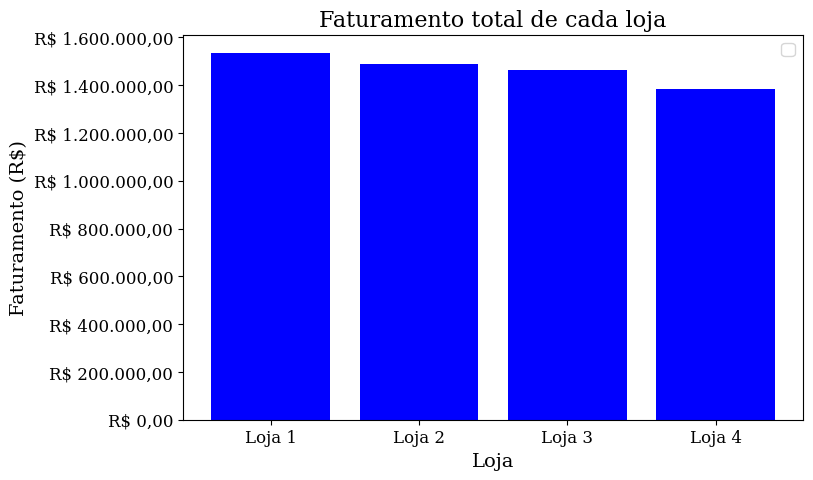

In [ ]:
# Cria um gráfico de barras com o faturamento total de cada loja
fig, ax = plt.subplots()

# Usa o método do objeto Axes
ax.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='blue')
# Adiciona rótulos e título
ax.set_title('Faturamento total de cada loja')
ax.set_xlabel('Loja')
ax.set_ylabel('Faturamento (R$)')

# Melhora a legibilidade dos yticks para valores monetários
def format_func(value: float, tick_number: int) -> str:
    """
    Formata os valores do eixo y para o padrão monetário brasileiro.

    Esta função é usada como formatador para o eixo y em gráficos Matplotlib,
    através da classe FuncFormatter. Ela transforma valores numéricos como 1234.5
    em strings formatadas no estilo de moeda brasileira: 'R$ 1.234,50'.

    A formatação inicial usa a notação padrão americana (vírgula para milhar e
    ponto para decimal). Para converter corretamente para o padrão brasileiro 
    (ponto para milhar e vírgula para decimal), é utilizada uma sequência de 
    substituições com o método `str.replace()`:

    1. Primeiro, vírgulas são temporariamente substituídas por um caractere neutro ('X'),
       para evitar conflitos ao substituir os pontos em seguida.
    2. Depois, os pontos (decimais) são trocados por vírgulas.
    3. Por fim, o caractere neutro ('X') é trocado por ponto.

    Essa abordagem garante que os separadores de milhar e decimal não sejam confundidos
    ou sobrescritos de forma errada.

    Parâmetros:
    ----------
    value : float
        O valor numérico a ser formatado (gerado automaticamente pelo Matplotlib).
    
    tick_number : int
        Índice da marcação no eixo (não é usado diretamente, mas é exigido pela interface do FuncFormatter).

    Retorna:
    -------
    str
        Uma string com o valor formatado como moeda brasileira (ex: 'R$ 1.234,50').
    """
    # Formata o número com separador de milhar americano e 2 casas decimais
    valor_formatado = f'R$ {value:,.2f}'

    # Substitui vírgulas por 'X' (temporário), pontos por vírgulas, e 'X' por pontos
    valor_formatado = valor_formatado.replace(',', 'X').replace('.', ',').replace('X', '.')

    return valor_formatado


ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_func)) 

# Exibe o gráfico
plt.show()

## 2. Vendas por Categoria


In [ ]:
# Quantidade de produtos vendidos por categoria
for i in range(len(lista_datasets)):
    print(f"Quantidade de produtos vendidos por categoria na loja {i+1}:")
    print(
        lista_datasets[i]
        .groupby(by="Categoria do Produto")["Produto"]
        .count()
        .sort_values(ascending=False)
    )
    print("\n")

Quantidade de produtos vendidos por categoria na loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: Produto, dtype: int64


Quantidade de produtos vendidos por categoria na loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: Produto, dtype: int64


Quantidade de produtos vendidos por categoria na loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: Prod

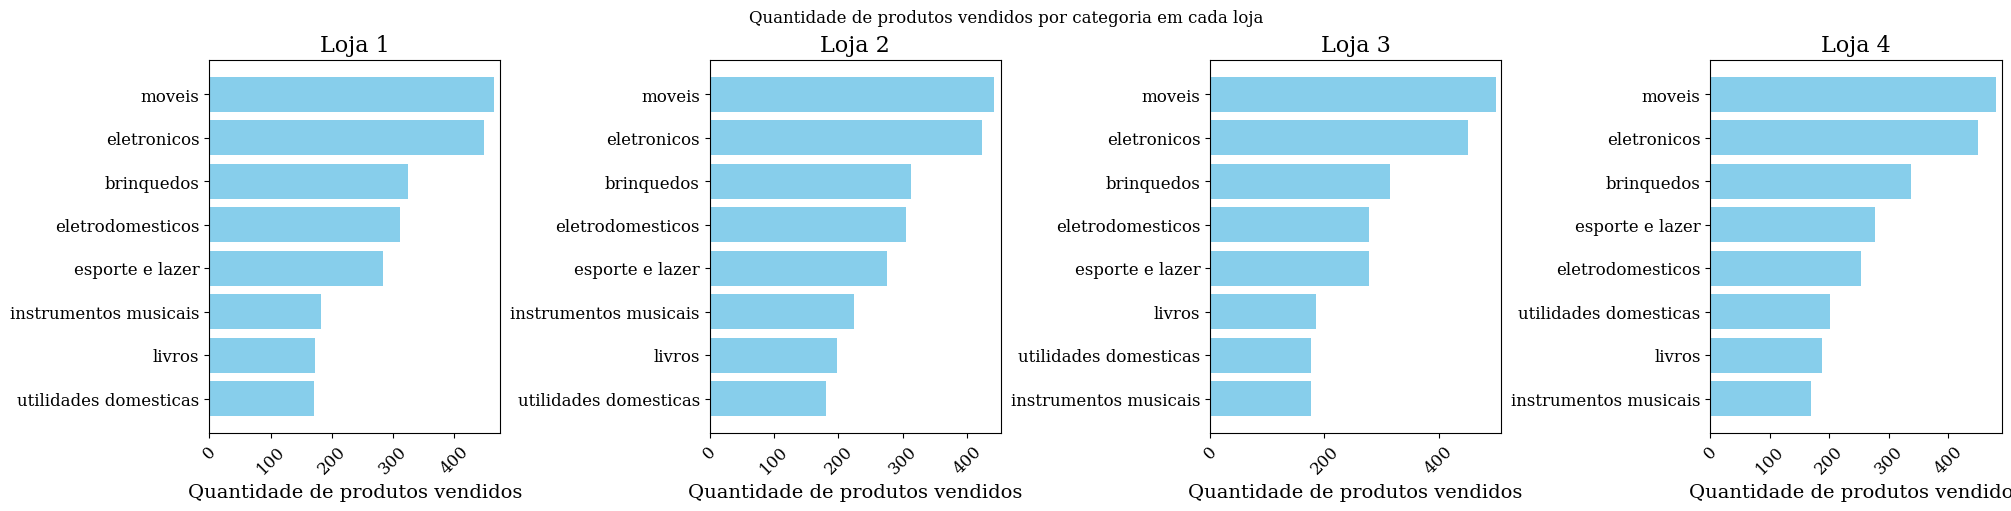

In [27]:
n_lojas = len(lista_datasets)

# Cria uma linha com N subgráficos (1 por loja)
fig, axs = plt.subplots(1, n_lojas, figsize=(5 * n_lojas, 5), constrained_layout=True)

# Se houver só uma loja, axs não será uma lista → precisamos garantir isso
if n_lojas == 1:
    axs = [axs]

for i, df in enumerate(lista_datasets):
    contagem = df['Categoria do Produto'].value_counts().sort_values(ascending=True)
    
    axs[i].barh(contagem.index, contagem.values, color='skyblue')
    axs[i].set_title(f'Loja {i+1}')
    axs[i].set_xlabel('Quantidade de produtos vendidos')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_xlim(0, contagem.max() + 10)

fig.suptitle('Quantidade de produtos vendidos por categoria em cada loja')
plt.show()

In [ ]:
# Faturamento por categoria
for i in range(len(lista_datasets)):
    print(f"Faturamento por categoria na loja {i+1}:")
    print(
        lista_datasets[i]
        .groupby(by="Categoria do Produto")["Preço"]
        .sum()
        .sort_values(ascending=False)
    )
    print("\n")

Faturamento por categoria na loja 1:
Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64


Faturamento por categoria na loja 2:
Categoria do Produto
eletronicos              547773.71
eletrodomesticos         464758.13
moveis                   235234.68
instrumentos musicais    139987.03
esporte e lazer           46326.09
brinquedos                21262.21
utilidades domesticas     19662.86
livros                    13454.35
Name: Preço, dtype: float64


Faturamento por categoria na loja 3:
Categoria do Produto
eletronicos              547699.92
eletrodomesticos         438984.89
moveis                   268095.56
instrumentos musicais    103174.45
esporte e lazer           47456.10
brinquedos                25869

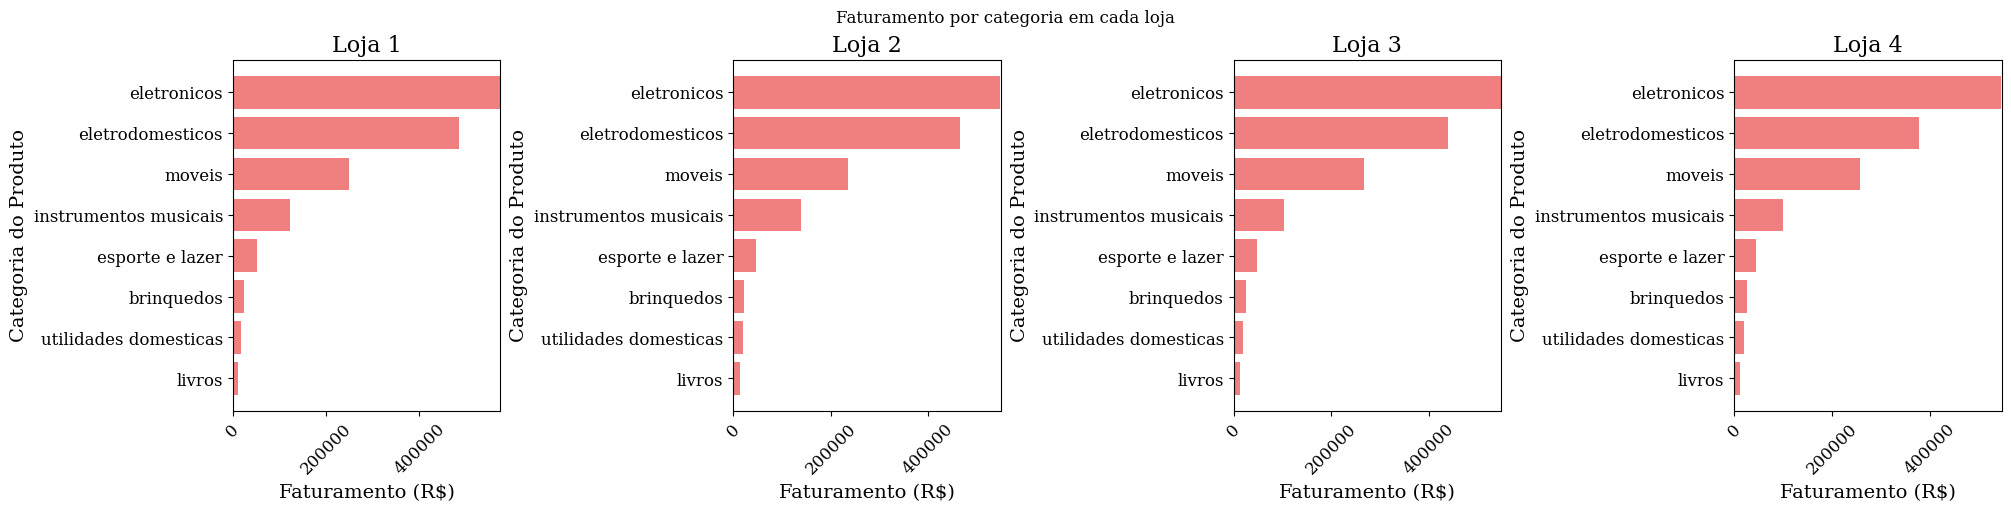

In [28]:
n_lojas = len(lista_datasets)

# Cria uma linha com N subgráficos (1 por loja)
fig, axs = plt.subplots(1, n_lojas, figsize=(5 * n_lojas, 5), constrained_layout=True)

# Se houver só uma loja, axs não será uma lista → precisamos garantir isso
if n_lojas == 1:
    axs = [axs]

for i, df in enumerate(lista_datasets):
    # Soma o faturamento por categoria e ordena de forma decrescente
    faturamento_categoria = df.groupby(by="Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
    
    # Cria um gráfico de barras horizontais para cada loja
    axs[i].barh(faturamento_categoria.index, faturamento_categoria.values, color='lightcoral')
    axs[i].set_title(f'Loja {i+1}')
    axs[i].set_xlabel('Faturamento (R$)')
    axs[i].set_ylabel('Categoria do Produto')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_xlim(0, faturamento_categoria.max() + 1000)  # Ajusta o limite do eixo X para melhor visualização
    
    # Inverte o eixo Y para garantir que o maior valor apareça no topo
    axs[i].invert_yaxis()

# Título geral
fig.suptitle('Faturamento por categoria em cada loja')

# Exibe o gráfico
plt.show()

## 3. Média de Avaliação das Lojas

In [ ]:
# Média de avaliação dos produtos por loja
for loja in range(len(lista_datasets)):
    media_avaliacao = lista_datasets[loja]["Avaliação da compra"].mean()
    print(f"Média de avaliação da loja {loja+1}: {media_avaliacao:.2f}")

Média de avaliação da loja 1: 3.98
Média de avaliação da loja 2: 4.04
Média de avaliação da loja 3: 4.05
Média de avaliação da loja 4: 4.00


## 4. Produtos Mais e Menos Vendidos

In [30]:
def produtos_extremos(df: pd.DataFrame, coluna_produto: str = "Produto") -> Tuple[Tuple[str, int], Tuple[str, int]]:
    """
    Retorna o produto mais vendido e o menos vendido de um DataFrame.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados de vendas.
    - coluna_produto (str): Nome da coluna que contém os nomes ou identificadores dos produtos.

    Retorna:
    - Tuple contendo:
        - (nome_produto_mais_vendido, unidades_vendidas)
        - (nome_produto_menos_vendido, unidades_vendidas)
    """
    contagem = df[coluna_produto].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()
    return (mais_vendido, contagem[mais_vendido]), (menos_vendido, contagem[menos_vendido])


In [ ]:
# Aplicando a função em cada loja
for i in range(len(lista_datasets)):
    mais_vendido, menos_vendido = produtos_extremos(lista_datasets[i])
    print(f"Loja {i+1}:")
    print(f"Produto mais vendido: {mais_vendido[0]} ({mais_vendido[1]} unidades)")
    print(f"Produto menos vendido: {menos_vendido[0]} ({menos_vendido[1]} unidades)")
    print("\n")

Loja 1:
Produto mais vendido: Micro-ondas (60 unidades)
Produto menos vendido: Headset (33 unidades)


Loja 2:
Produto mais vendido: Iniciando em programação (65 unidades)
Produto menos vendido: Jogo de tabuleiro (32 unidades)


Loja 3:
Produto mais vendido: Kit banquetas (57 unidades)
Produto menos vendido: Blocos de montar (35 unidades)


Loja 4:
Produto mais vendido: Cama box (62 unidades)
Produto menos vendido: Guitarra (33 unidades)




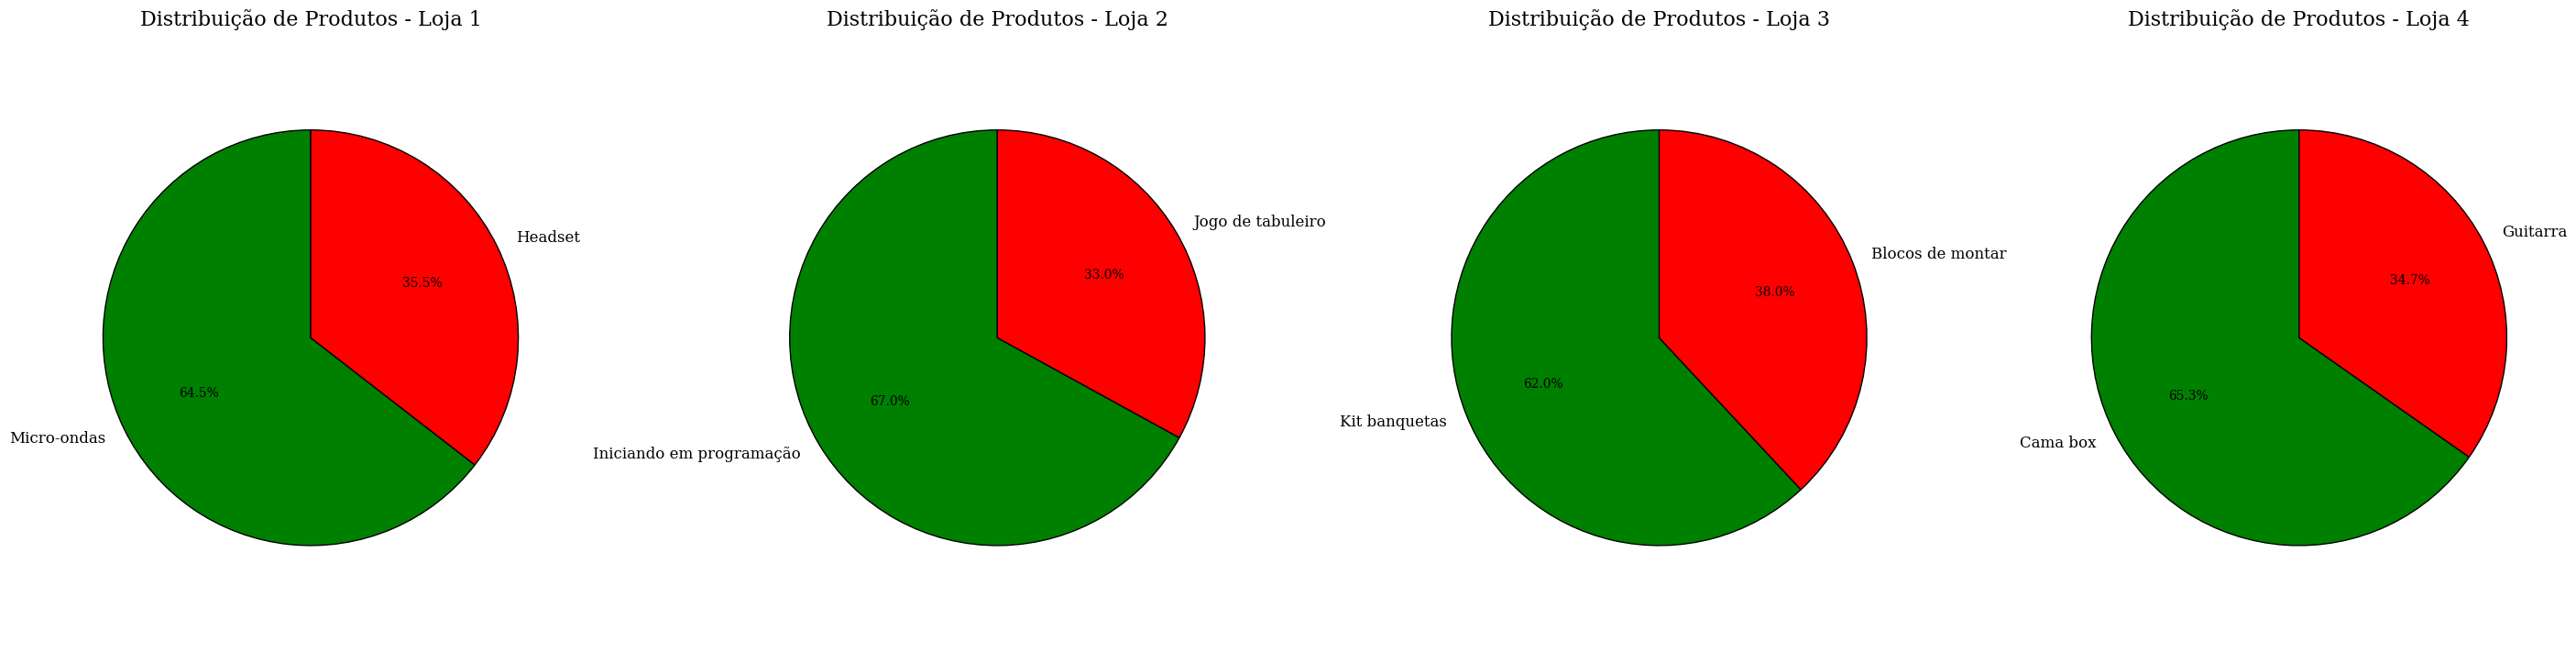

In [32]:
# Preparando os dados para o gráfico de pizza
produtos_mais_vendidos = []
produtos_menos_vendidos = []

for i in range(len(lista_datasets)):
    mais_vendido, menos_vendido = produtos_extremos(lista_datasets[i])
    produtos_mais_vendidos.append((f"Loja {i+1}", mais_vendido[0], mais_vendido[1]))
    produtos_menos_vendidos.append((f"Loja {i+1}", menos_vendido[0], menos_vendido[1]))

# Criando os gráficos de pizza ao lado
n_lojas = len(produtos_mais_vendidos)
fig, axs = plt.subplots(1, n_lojas, figsize=(7 * n_lojas, 7), constrained_layout=True)

# Se houver apenas uma loja, axs não será uma lista, então precisamos garantir isso
if n_lojas == 1:
    axs = [axs]

# Criando um gráfico de pizza para cada loja
for i, (loja, mais_produto, mais_unidades) in enumerate(produtos_mais_vendidos):
    ax = axs[i]

    # Dados para o gráfico de pizza
    labels = [mais_produto, produtos_menos_vendidos[i][1]]
    sizes = [mais_unidades, produtos_menos_vendidos[i][2]]
    colors = ['green', 'red']

    # Criando o gráfico de pizza
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
    ax.set_title(f"Distribuição de Produtos - {loja}")
    ax.axis('equal')  # Assegura que o gráfico de pizza seja circular

# Exibindo o gráfico
plt.show()


## 5. Frete Médio por Loja


In [ ]:
import matplotlib.ticker as ticker

Média do frete da loja 1: R$ 34.69
Média do frete da loja 2: R$ 33.62
Média do frete da loja 3: R$ 33.07
Média do frete da loja 4: R$ 31.28


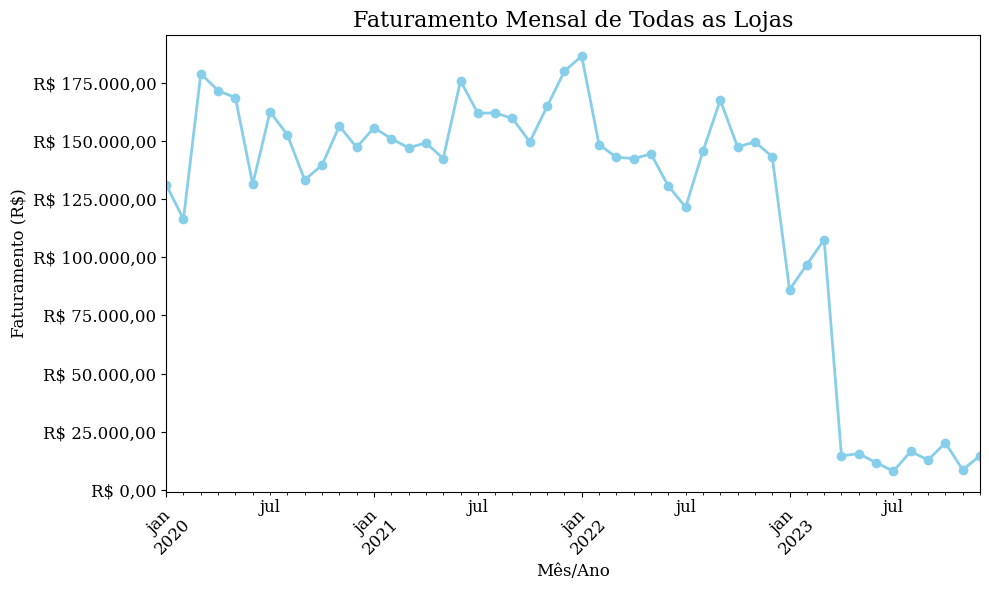

In [41]:
# Agrupar os dados por mês e ano e somar o faturamento
faturamento_mensal = lojas_df.groupby(lojas_df['Data da Compra'].dt.to_period('M'))['Preço'].sum()

# Converter o índice para o formato datetime
faturamento_mensal.index = faturamento_mensal.index.to_timestamp()

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o gráfico de linha
faturamento_mensal.plot(ax=ax, color='skyblue', marker='o', linewidth=2)

# Adicionando título e rótulos
ax.set_title('Faturamento Mensal de Todas as Lojas', fontsize=16)
ax.set_xlabel('Mês/Ano', fontsize=12)
ax.set_ylabel('Faturamento (R$)', fontsize=12)

# Melhorando o formato dos ticks no eixo Y (valores monetários)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Melhorando a legibilidade dos ticks no eixo X
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

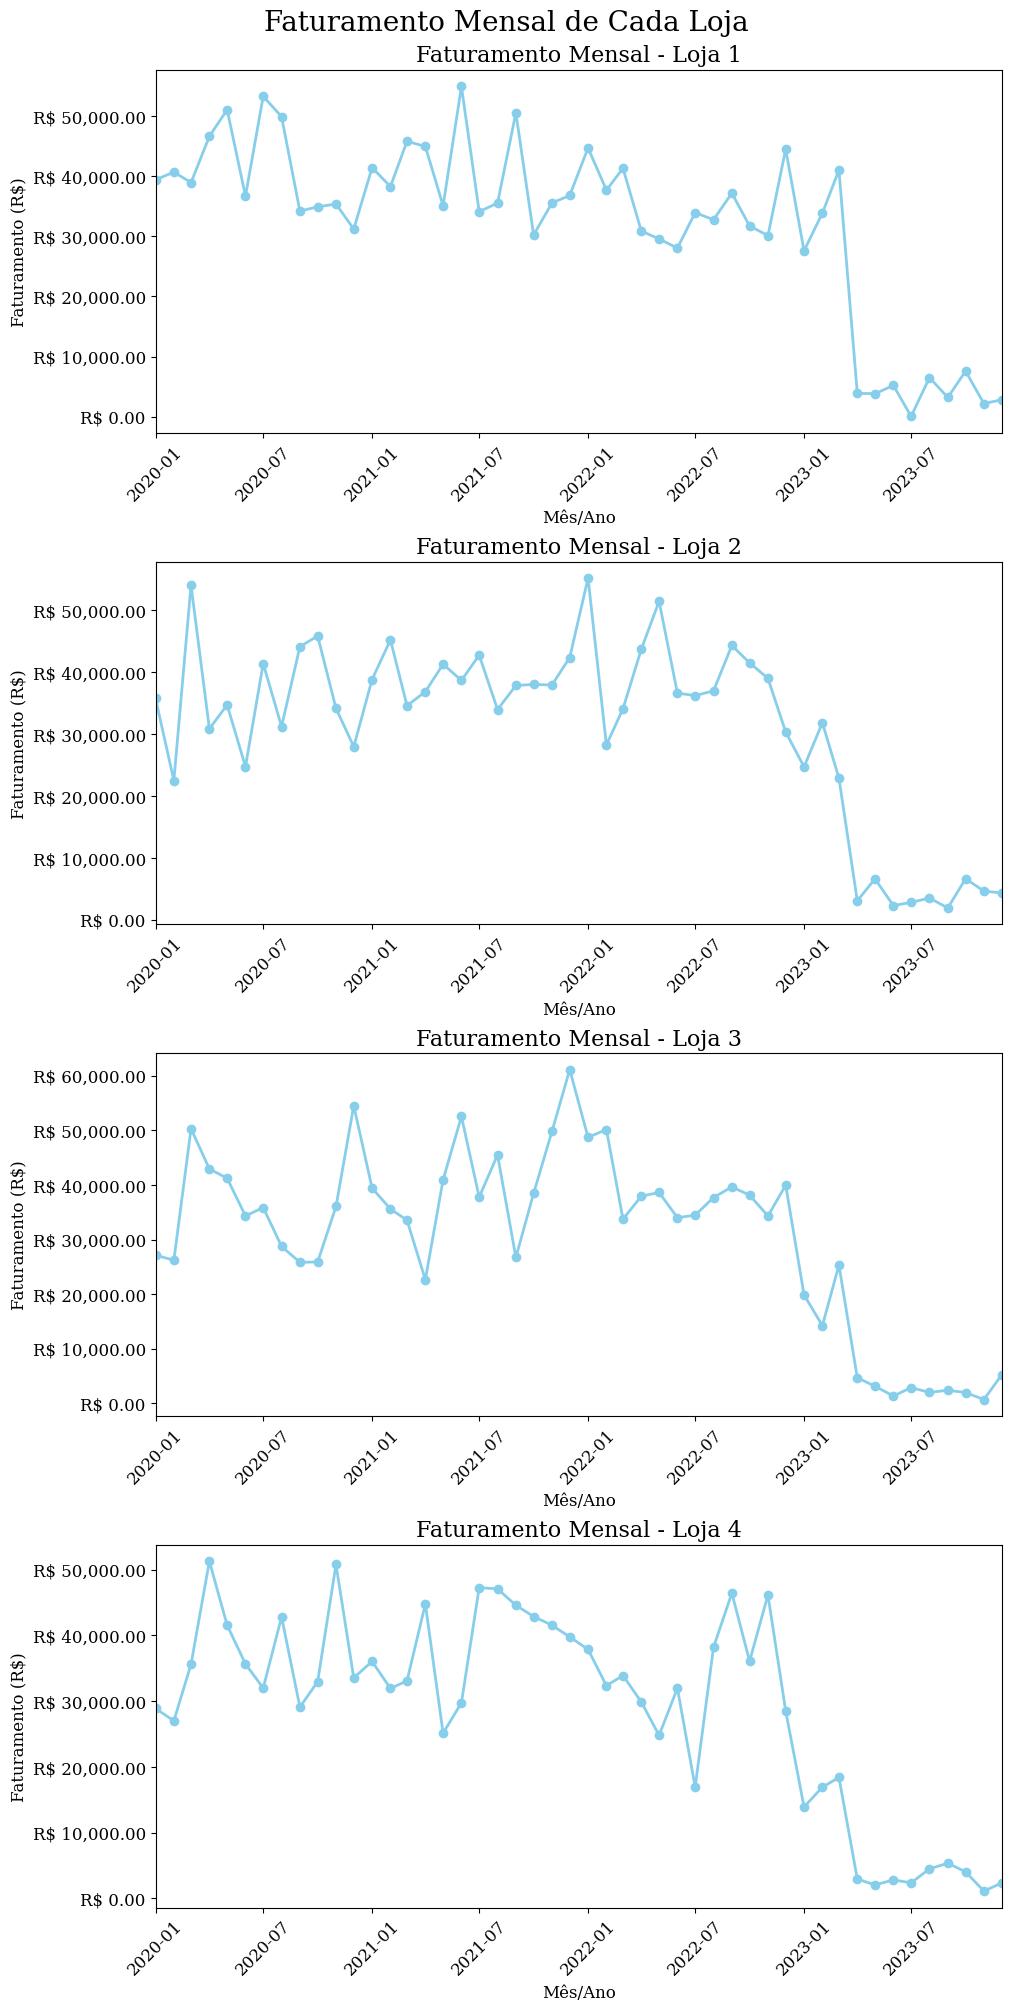

In [45]:
# Definindo o formato monetário para o eixo Y
def format_func(value, tick_number):
    return f'R$ {value:,.2f}'

# Número de lojas
n_lojas = len(lista_datasets)

# Criando a figura com múltiplos subgráficos
fig, axs = plt.subplots(n_lojas, 1, figsize=(10, 5 * n_lojas), constrained_layout=True)

# Garantindo que axs seja uma lista, mesmo quando for uma única loja
if n_lojas == 1:
    axs = [axs]

# Iterando por cada loja e seu DataFrame
for i, df in enumerate(lista_datasets):
    # Agrupar os dados por mês e ano, somando o faturamento
    faturamento_mensal = df.groupby(df['Data da Compra'].dt.to_period('M'))['Preço'].sum()

    # Verifica se há faturamento mensal para evitar erro no gráfico
    if faturamento_mensal.empty:
        axs[i].plot([], [], marker='o', color='red')  # Se não houver dados, plotar uma linha vazia
        axs[i].set_title(f'Faturamento Mensal - {lojas[i]} (Sem dados)', fontsize=16)
        continue

    # Converter o índice para o formato datetime
    faturamento_mensal.index = faturamento_mensal.index.to_timestamp()

    # Plotando o gráfico de linha
    axs[i].plot(faturamento_mensal.index, faturamento_mensal.values, marker='o', linewidth=2, color='skyblue')

    # Adicionando título e rótulos
    axs[i].set_title(f'Faturamento Mensal - {lojas[i]}', fontsize=16)
    axs[i].set_xlabel('Mês/Ano', fontsize=12)
    axs[i].set_ylabel('Faturamento (R$)', fontsize=12)

    # Melhorando o formato dos ticks no eixo Y (valores monetários)
    axs[i].yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

    # Melhorando a legibilidade dos ticks no eixo X
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_xlim(faturamento_mensal.index.min(), faturamento_mensal.index.max())  # Ajusta o limite do eixo X para melhor visualização

# Título geral
fig.suptitle('Faturamento Mensal de Cada Loja', fontsize=20)

# Exibindo o gráfico
plt.show()


## Relatório de Análise para Decisão sobre a Venda de Loja

---

### Desenvolvimento

#### 1. Faturamento Total das Lojas

O faturamento total das lojas é um fator essencial para avaliar o desempenho de cada uma. Abaixo estão os dados de faturamento:

- **Loja 1**: R$ 1.534.509,12
- **Loja 2**: R$ 1.488.459,06
- **Loja 3**: R$ 1.464.025,03
- **Loja 4**: R$ 1.384.497,58

**Análise**: A Loja 1 apresenta o maior faturamento total, seguida pela Loja 2 e Loja 3. A Loja 4 é a que apresenta o menor faturamento total, indicando um desempenho inferior em comparação com as demais.

#### 2. Categorias de Produtos Mais e Menos Vendidas

A distribuição das vendas por categoria também é relevante para entender o comportamento do consumidor. Abaixo, destacam-se as categorias mais e menos vendidas por loja:

##### Loja 1:
- **Mais vendida**: Móveis (465 unidades)
- **Menos vendida**: Livros (173 unidades)

##### Loja 2:
- **Mais vendida**: Móveis (442 unidades)
- **Menos vendida**: Instrumentos Musicais (224 unidades)

##### Loja 3:
- **Mais vendida**: Móveis (499 unidades)
- **Menos vendida**: Instrumentos Musicais (177 unidades)

##### Loja 4:
- **Mais vendida**: Móveis (480 unidades)
- **Menos vendida**: Instrumentos Musicais (170 unidades)

**Análise**: A categoria **móveis** é a mais vendida em todas as lojas, refletindo uma demanda forte por esse tipo de produto. No entanto, a **categoria de instrumentos musicais** é consistentemente a menos vendida em todas as lojas, incluindo a Loja 4, que também apresenta baixo desempenho nesta área.

#### 3. Faturamento por Categoria

Analisando o faturamento por categoria, a **categoria de eletrônicos** lidera em termos de faturamento para todas as lojas, com exceção da Loja 4, onde **eletrodomésticos** têm um desempenho superior. Abaixo, o faturamento por categoria:

##### Loja 1:
- **Eletrônicos**: R$ 572.659,23
- **Eletrodomésticos**: R$ 484.913,36
- **Móveis**: R$ 250.178,11

##### Loja 2:
- **Eletrônicos**: R$ 547.773,71
- **Eletrodomésticos**: R$ 464.758,13
- **Móveis**: R$ 235.234,68

##### Loja 3:
- **Eletrônicos**: R$ 547.699,92
- **Eletrodomésticos**: R$ 438.984,89
- **Móveis**: R$ 268.095,56

##### Loja 4:
- **Eletrônicos**: R$ 545.966,86
- **Eletrodomésticos**: R$ 377.680,65
- **Móveis**: R$ 256.705,65

**Análise**: A **categoria de eletrônicos** é a mais lucrativa para todas as lojas. A Loja 4 apresenta um desempenho mais fraco, especialmente em **eletrodomésticos**, quando comparada às outras lojas, o que a coloca em desvantagem em termos de rentabilidade.

#### 4. Avaliações dos Clientes

As avaliações dos clientes são um indicador importante sobre a qualidade da experiência oferecida pelas lojas. As médias de avaliação por loja são as seguintes:

- **Loja 1**: Média de 3.98
- **Loja 2**: Média de 4.04
- **Loja 3**: Média de 4.05
- **Loja 4**: Média de 4.00

**Análise**: A Loja 3 apresenta a melhor média de avaliação (4.05), seguida pela Loja 2 com 4.04. A Loja 1 tem a média mais baixa, com 3.98, e a Loja 4, com 4.00, apresenta um desempenho razoável, mas ainda inferior à média das outras lojas.

#### 5. Frete Médio

O custo do frete também é um fator importante para a decisão de compra dos clientes. Abaixo estão as médias de frete por loja:

- **Loja 1**: R$ 34.69
- **Loja 2**: R$ 33.62
- **Loja 3**: R$ 33.07
- **Loja 4**: R$ 31.28

**Análise**: A Loja 4 oferece o frete mais barato (R$ 31.28), o que pode atrair mais clientes, especialmente em comparação com as outras lojas que possuem fretes mais elevados.

---

### Conclusão

Após uma análise detalhada de todos os fatores, recomendamos que o Senhor João **venda a Loja 4**. A principal justificativa para essa recomendação é que a Loja 4 apresenta o menor faturamento total, com um desempenho mais fraco na categoria de **eletrodomésticos**, que tem impacto direto em sua rentabilidade. Embora a loja tenha um custo de frete mais competitivo, seu desempenho financeiro e suas avaliações gerais não se comparam tão favoravelmente com as demais lojas.

**Recomendação**: Venda a **Loja 4**.
